In [18]:
import numpy as np

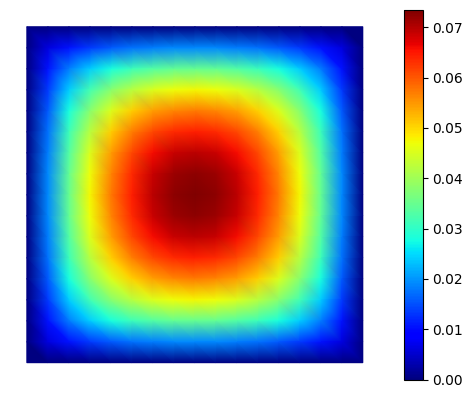

Warning: VTK requires 3D points, but 2D points given. Appending 0 third component.

In [1]:
# from skfem import *
from skfem import MeshTri, Basis, ElementTriP1, BilinearForm, LinearForm, enforce, solve
from skfem.helpers import dot, grad

# create the mesh
mesh = MeshTri().refined(4)
# or, with your own points and elements:
# mesh = MeshTri(points, elements)

basis = Basis(mesh, ElementTriP1())


@BilinearForm
def laplace(u, v, _):
    return dot(grad(u), grad(v))


@LinearForm
def rhs(v, _):
    return 1.0 * v


A = laplace.assemble(basis)
b = rhs.assemble(basis)

# Dirichlet boundary conditions
A, b = enforce(A, b, D=mesh.boundary_nodes())

# solve the linear system
x = solve(A, b)

# plot using matplotlib
mesh.plot(x, shading="gouraud", colorbar=True).show()
# or, save to external file:
# mesh.save("output.vtk", point_data={"solution": x})


In [4]:
print(mesh)

<skfem MeshTri1 object>
  Number of elements: 512
  Number of vertices: 289
  Number of nodes: 289
  Named boundaries [# facets]: left [16], bottom [16], right [16], top [16]


In [5]:
mesh.boundary_nodes()

array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  13,  14,
        16,  17,  18,  25,  26,  27,  29,  30,  32,  33,  34,  35,  36,
        39,  40,  49,  50,  53,  54,  81,  82,  83,  85,  86,  88,  89,
        90,  91,  92,  95,  96, 105, 106, 109, 110, 113, 114, 117, 118,
       121, 122, 131, 132, 135, 136, 145, 146, 149, 150, 153, 154])

In [10]:
mesh.left

AttributeError: 'MeshTri1' object has no attribute 'left'

In [12]:
mesh.boundaries

{'left': array([  1,   5,  14,  15,  36,  37,  54,  55, 116, 117, 134, 135, 176,
        177, 180, 181]),
 'bottom': array([  0,   2,  10,  11,  32,  33,  40,  41, 112, 113, 120, 121, 156,
        157, 160, 161]),
 'right': array([  4,   8,  24,  25,  50,  51,  68,  69, 130, 131, 148, 149, 232,
        233, 236, 237]),
 'top': array([  7,   9,  28,  29,  64,  65,  72,  73, 144, 145, 152, 153, 252,
        253, 256, 257])}

In [20]:
mesh.boundaries["left"]

array([  1,   5,  14,  15,  36,  37,  54,  55, 116, 117, 134, 135, 176,
       177, 180, 181])

In [21]:
mesh.boundaries["right"]

array([  4,   8,  24,  25,  50,  51,  68,  69, 130, 131, 148, 149, 232,
       233, 236, 237])

In [22]:
mesh.boundaries["left"] + mesh.boundaries["right"]

array([  5,  13,  38,  40,  86,  88, 122, 124, 246, 248, 282, 284, 408,
       410, 416, 418])

In [23]:
np.concatenate([mesh.boundaries["left"], mesh.boundaries["right"]], axis=0)

array([  1,   5,  14,  15,  36,  37,  54,  55, 116, 117, 134, 135, 176,
       177, 180, 181,   4,   8,  24,  25,  50,  51,  68,  69, 130, 131,
       148, 149, 232, 233, 236, 237])

In [24]:
np.concatenate([mesh.boundaries["left"], mesh.boundaries["right"]])

array([  1,   5,  14,  15,  36,  37,  54,  55, 116, 117, 134, 135, 176,
       177, 180, 181,   4,   8,  24,  25,  50,  51,  68,  69, 130, 131,
       148, 149, 232, 233, 236, 237])

In [25]:
type({"left", "right"})

set

In [9]:
help(mesh)

Help on MeshTri1 in module skfem.mesh.mesh_tri_1 object:

class MeshTri1(skfem.mesh.mesh_simplex.MeshSimplex, skfem.mesh.mesh_2d.Mesh2D)
 |  MeshTri1(doflocs: numpy.ndarray = <factory>, t: numpy.ndarray = <factory>, _boundaries: Optional[Dict[str, numpy.ndarray]] = None, _subdomains: Optional[Dict[str, numpy.ndarray]] = None, elem: Type[skfem.element.element.Element] = <class 'skfem.element.element_tri.element_tri_p1.ElementTriP1'>, affine: bool = True, sort_t: bool = True, validate: bool = True) -> None
 |
 |  A standard first-order triangular mesh.
 |
 |  Method resolution order:
 |      MeshTri1
 |      skfem.mesh.mesh_simplex.MeshSimplex
 |      skfem.mesh.mesh_2d.Mesh2D
 |      skfem.mesh.mesh.Mesh
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __eq__(self, other)
 |      Return self==value.
 |
 |  __init__(self, doflocs: numpy.ndarray = <factory>, t: numpy.ndarray = <factory>, _boundaries: Optional[Dict[str, numpy.ndarray]] = None, _subdomains: Optional[Dict[str, num

In [2]:
help(enforce)

Help on function enforce in module skfem.utils:

enforce(A: scipy.sparse._matrix.spmatrix, b: Union[numpy.ndarray, scipy.sparse._matrix.spmatrix, NoneType] = None, x: Optional[numpy.ndarray] = None, I: Union[numpy.ndarray, skfem.assembly.dofs.DofsView, Dict[str, skfem.assembly.dofs.DofsView], NoneType] = None, D: Union[numpy.ndarray, skfem.assembly.dofs.DofsView, Dict[str, skfem.assembly.dofs.DofsView], NoneType] = None, diag: float = 1.0, overwrite: bool = False) -> Union[scipy.sparse._matrix.spmatrix, Tuple[scipy.sparse._matrix.spmatrix, numpy.ndarray], Tuple[scipy.sparse._matrix.spmatrix, scipy.sparse._matrix.spmatrix]]
    Enforce degrees-of-freedom of a linear system.

    An alternative to :func:`~skfem.utils.condense` which sets the matrix
    diagonals to one and right-hand side vector to the enforced
    degree-of-freedom value.

    .. note::

        The original system is both returned
        (for compatibility with :func:`skfem.utils.solve`) and optionally (if
        `ov